# Exploratory Data Analysis

In [252]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
%matplotlib inline

from library.sb_utils import save_file

In [253]:
# import data
wnv = pd.read_csv('../data/WestNileVirus.csv')
wnv.head()

,Trap,Block,Latitude,Longitude,Date,Species,AddressAccuracy,NumMosquitos,Tmax,Tmin,...,Sunset,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,WnvPresent
0,T001,40,41.953705,-87.733974,2007-06-26,CULEX PIPIENS/RESTUANS,8,1,91.5,71.5,...,1931.0,0.0,0.0,0.0805,29.420,30.100,6.70,21.5,7.60,0
1,T001,40,41.953705,-87.733974,2007-07-11,CULEX PIPIENS/RESTUANS,8,1,77.0,62.5,...,1928.0,0.0,0.0,0.0000,29.255,29.925,8.95,30.0,11.05,0
2,T001,40,41.953705,-87.733974,2007-07-18,CULEX PIPIENS,8,1,85.0,69.0,...,1924.0,0.0,0.0,1.2350,29.145,29.835,9.70,24.0,10.35,0
3,T001,40,41.953705,-87.733974,2007-08-01,CULEX PIPIENS,8,1,91.5,69.0,...,1911.0,0.0,0.0,0.0000,29.315,29.990,2.80,11.0,3.90,0
4,T001,40,41.953705,-87.733974,2007-08-01,CULEX PIPIENS/RESTUANS,8,3,91.5,69.0,...,1911.0,0.0,0.0,0.0000,29.315,29.990,2.80,11.0,3.90,0


In [254]:
wnv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8610 entries, 0 to 8609
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Trap             8610 non-null   object 
 1   Block            8610 non-null   int64  
 2   Latitude         8610 non-null   float64
 3   Longitude        8610 non-null   float64
 4   Date             8610 non-null   object 
 5   Species          8610 non-null   object 
 6   AddressAccuracy  8610 non-null   int64  
 7   NumMosquitos     8610 non-null   int64  
 8   Tmax             8610 non-null   float64
 9   Tmin             8610 non-null   float64
 10  Tavg             8610 non-null   float64
 11  Depart           8610 non-null   float64
 12  DewPoint         8610 non-null   float64
 13  WetBulb          8610 non-null   float64
 14  Heat             8610 non-null   float64
 15  Cool             8610 non-null   float64
 16  Sunrise          8610 non-null   float64
 17  Sunset        

In [255]:
# convert 'Date' column to datetime
wnv['Date'] = pd.to_datetime(wnv['Date'], format="%Y/%m/%d")

In [256]:
wnv['Depth'].value_counts()

0.0    8610
Name: Depth, dtype: int64

In [257]:
# drop 'Depth' column
wnv.drop(labels='Depth', axis=1, inplace=True)

In [258]:
# create 'Month', 'Year' and 'Day' columns
wnv['Month'] = wnv['Date'].dt.month
wnv['Year'] = wnv['Date'].dt.year
wnv['Day']= wnv['Date'].dt.day
wnv.head().T

,0,1,2,3,4
Trap,T001,T001,T001,T001,T001
Block,40,40,40,40,40
Latitude,41.953705,41.953705,41.953705,41.953705,41.953705
Longitude,-87.733974,-87.733974,-87.733974,-87.733974,-87.733974
Date,2007-06-26 00:00:00,2007-07-11 00:00:00,2007-07-18 00:00:00,2007-08-01 00:00:00,2007-08-01 00:00:00
Species,CULEX PIPIENS/RESTUANS,CULEX PIPIENS/RESTUANS,CULEX PIPIENS,CULEX PIPIENS,CULEX PIPIENS/RESTUANS
AddressAccuracy,8,8,8,8,8
NumMosquitos,1,1,1,1,3
Tmax,91.5,77.0,85.0,91.5,91.5
Tmin,71.5,62.5,69.0,69.0,69.0


In [259]:
# wnv present
wnv1 = wnv[wnv['WnvPresent'] == 1]

wnv1_2007 = wnv1[wnv1['Year'] == 2007]
wnv1_2009 = wnv1[wnv1['Year'] == 2009]
wnv1_2011 = wnv1[wnv1['Year'] == 2011]
wnv1_2013 = wnv1[wnv1['Year'] == 2013]

# wnv not present
wnv0 = wnv[wnv['WnvPresent'] == 0]

wnv0_2007 = wnv0[wnv0['Year'] == 2007]
wnv0_2009 = wnv0[wnv0['Year'] == 2009]
wnv0_2011 = wnv0[wnv0['Year'] == 2011]
wnv0_2013 = wnv0[wnv0['Year'] == 2013]

Since our goal is to find out when and where to spray in the city, we should first look to see if there are any clear parterns with the location and time variables we currently have. We will also want to examine how each variable relates to the presence of the virus.

In [365]:
# We know we only have data for 2007, 2009, 2011, and 2013. This function will make it easier to visualize the data.
def scatter(column, alpha=1):
    """This function creates 4 scatter plots with 'Date' on the x-axis and column on the y-axis.
    alpha controls the alpha for the WnvPresent=0
    
    Cases where the virus is present will be shown as a red 'x' while cases where the virus is absent will
    show as a blue '+'.
    """
    
    fig, ax = plt.subplots(1,4, figsize=(15,5), sharey=True)
    fig.suptitle('{} vs Time'.format(column))
    
    # 2007
    sns.scatterplot(ax=ax[0], data=wnv1_2007, x='Date', y=column, marker='x', color='red')
    sns.scatterplot(ax=ax[0], data=wnv0_2007, x='Date', y=column, marker='+', alpha=alpha)
    ax[0].set_title('2007')
    ax[0].tick_params(axis='x', labelrotation=45)

    # 2009
    sns.scatterplot(ax=ax[1], data=wnv1_2009, x='Date', y=column, marker='x', color='red')
    sns.scatterplot(ax=ax[1], data=wnv0_2009, x='Date', y=column, marker='+', alpha=alpha)
    ax[1].set_title('2009')
    ax[1].tick_params(axis='x', labelrotation=45)

    # 2011
    sns.scatterplot(ax=ax[2], data=wnv1_2011, x='Date', y=column, marker='x', color='red')
    sns.scatterplot(ax=ax[2], data=wnv0_2011, x='Date', y=column, marker='+', alpha=alpha)
    ax[2].set_title('2011')
    ax[2].tick_params(axis='x', labelrotation=45)

    # 2013
    sns.scatterplot(ax=ax[3], data=wnv1_2013, x='Date', y=column, marker='x', color='red')
    sns.scatterplot(ax=ax[3], data=wnv0_2013, x='Date', y=column, marker='+', alpha=alpha)
    ax[3].set_title('2013')
    ax[3].tick_params(axis='x', labelrotation=45)

    fig.legend(labels=['WnvPresent=1','WnvPresent=0'])
    fig.tight_layout()
    plt.show()

In [297]:
# dual histogram plot
# We will use this fucntion to quickly visualize and compare differences in a column where the virus is present and
# when the virus is absent. If the shapes of the histograms are fairly similar, then the particular column has little
# to no influence on the presence of the virus.
def dual_histplot(column, figsize=(15,5), bins=30, sharey=False):
    """This creates two histograms. One where WnvPresent=1 and one where WnvPresent=0 for the given column.
    """
    fig, ax = plt.subplots(1,2, figsize=(15,5),sharey=sharey, sharex=True)

    # WnvPresent=0
    sns.histplot(ax=ax[0], data=wnv0,  x=column, bins=bins)
    ax[0].set_title('{} Where WnvPresent=0'.format(column))

    # WnvPresent=1
    sns.histplot(ax=ax[1], data=wnv1,  x=column, bins=bins, color='red')
    ax[1].set_title('{} Where WnvPresent=1'.format(column))

    plt.show()

#### Latitude and Longitude

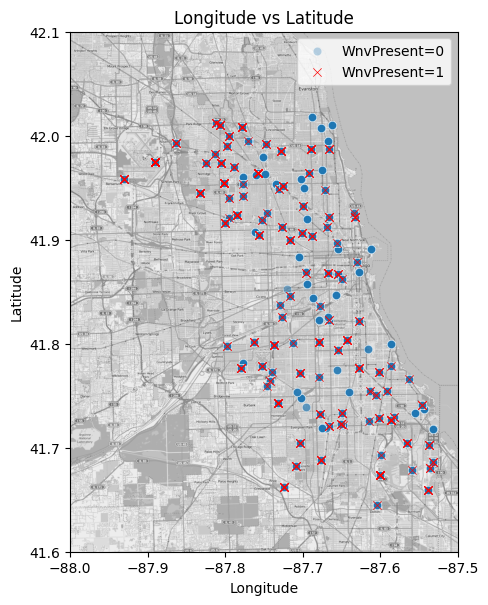

In [262]:
mapdata = np.loadtxt("../raw_data/mapdata_copyright_openstreetmap_contributors.txt")

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(5,7))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)

sns.scatterplot(data=wnv0, x='Longitude', y='Latitude', marker='o', alpha=0.3)
sns.scatterplot(data=wnv1, x='Longitude', y='Latitude', marker='x', color='red')

plt.title('Longitude vs Latitude')
plt.legend(labels=['WnvPresent=0','WnvPresent=1'])
plt.show()

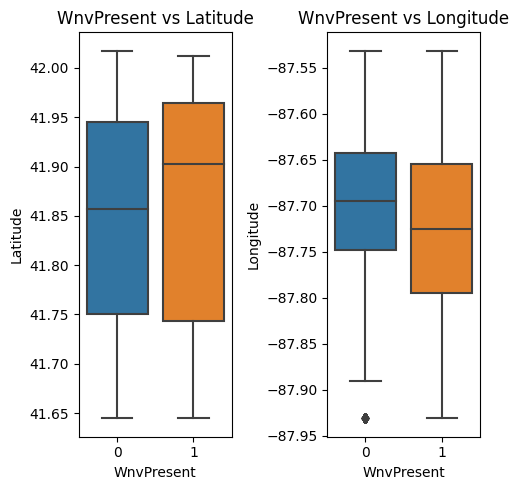

In [263]:
# Latitude and Longitude boxplots
fig, ax = plt.subplots(1,2, figsize=(5,5))

# Latitude
sns.boxplot(ax=ax[0], data=wnv, x='WnvPresent', y='Latitude')
ax[0].set_title('WnvPresent vs Latitude')

# Longitude
sns.boxplot(ax=ax[1], data=wnv, x='WnvPresent', y='Longitude')
ax[1].set_title('WnvPresent vs Longitude')

fig.tight_layout()
plt.show()

We can see there is a slightly greater latitude mean with a higher variance for the presense of the virus as opposed to when the virus was not present. We can also see there is a lower longitudemean and higher variance for the presence of the virus.

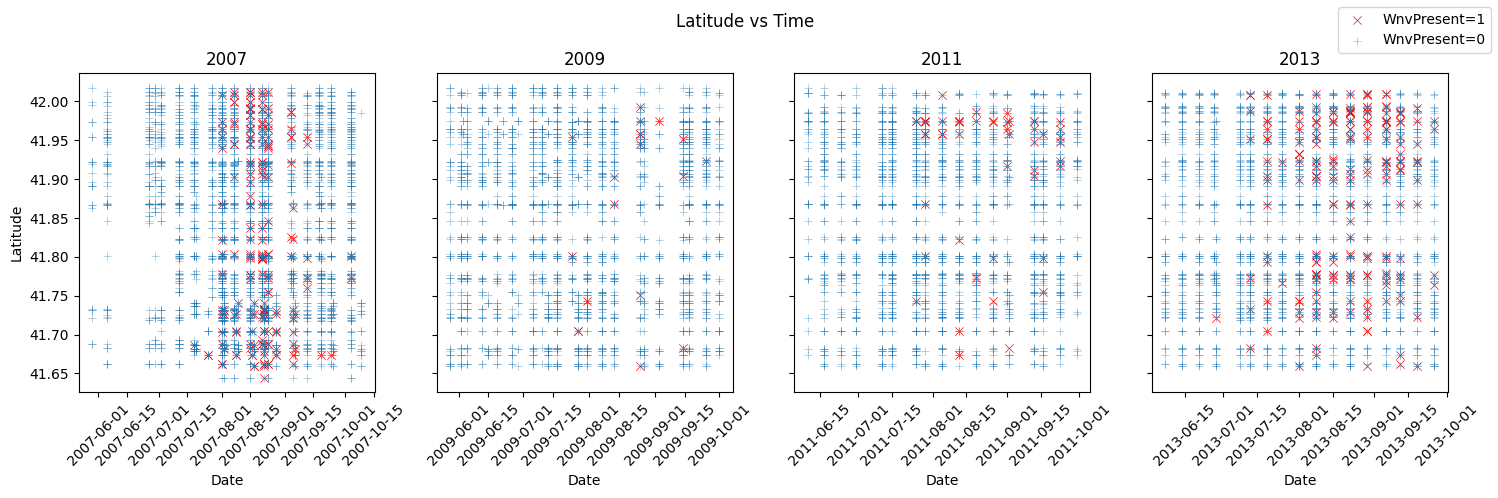

In [360]:
# Latitude vs Time
scatter('Latitude', alpha=0.5)

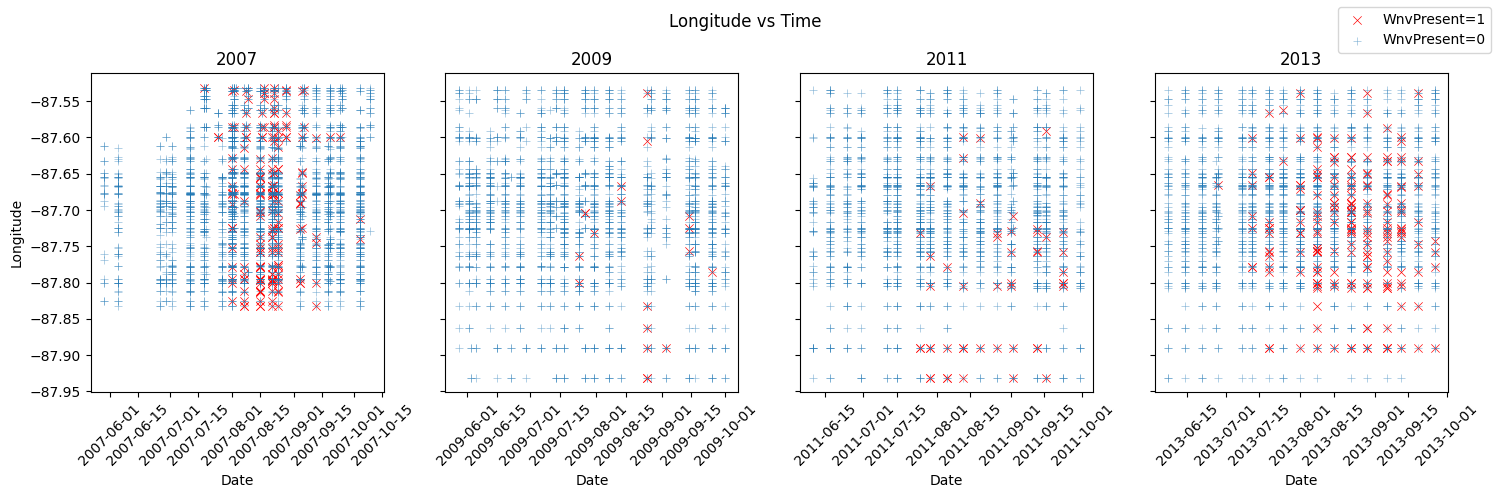

In [361]:
# Longitude vs Time
scatter('Longitude', alpha=0.5)

There is a general trend in each year showing that the entries where the virus is present is more concentrated than the entries where the virus is absent. The seem to be much more concentrated in August and September in 2007 and 2013. Regarding location, there does not seem to be a clear pattern where the virus tends to show up.

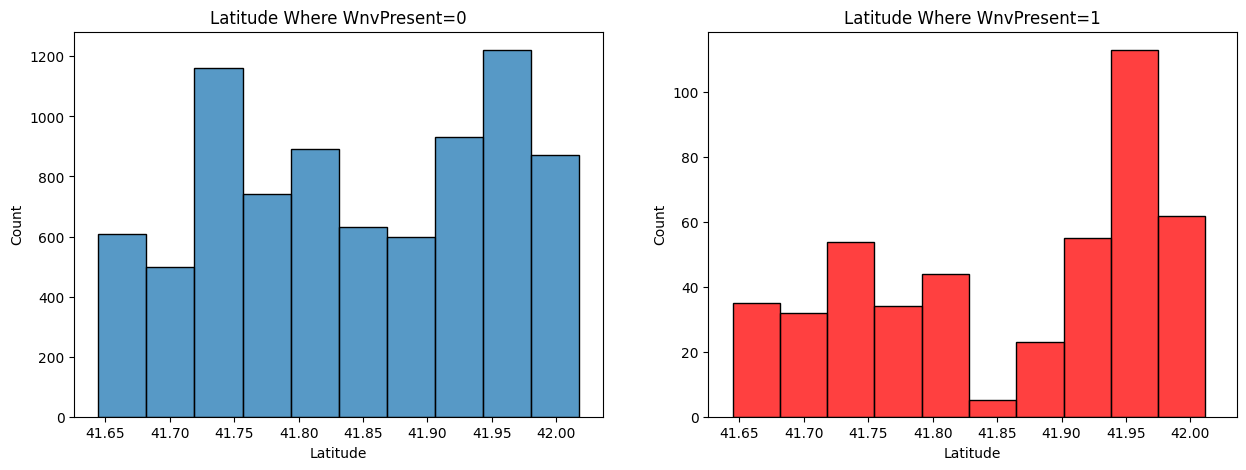

In [351]:
# Latitude Histograph
dual_histplot('Latitude', bins=10)

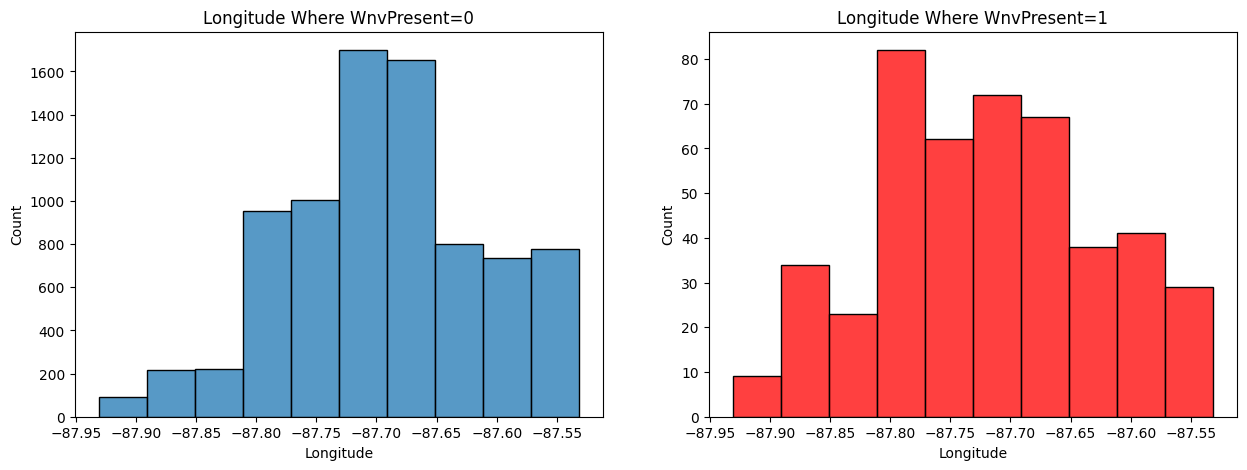

In [352]:
# Longitude Histograph
dual_histplot('Longitude', bins=10)

We can see there is a large spike of cases of the virus showing up at around 41.96 latitude. There is also a slight increase of cases at around -87.80 longitude.

#### WnvPresent and Month

In [266]:
# value counts per month for wnv present
wnv1['Month'].value_counts(normalize=True)

8     0.663020
9     0.240700
7     0.089716
10    0.004376
6     0.002188
Name: Month, dtype: float64

In [267]:
# value counts per month for wnv absent
wnv0['Month'].value_counts(normalize=True)

8     0.310561
7     0.254998
9     0.228505
6     0.163866
10    0.032135
5     0.009935
Name: Month, dtype: float64

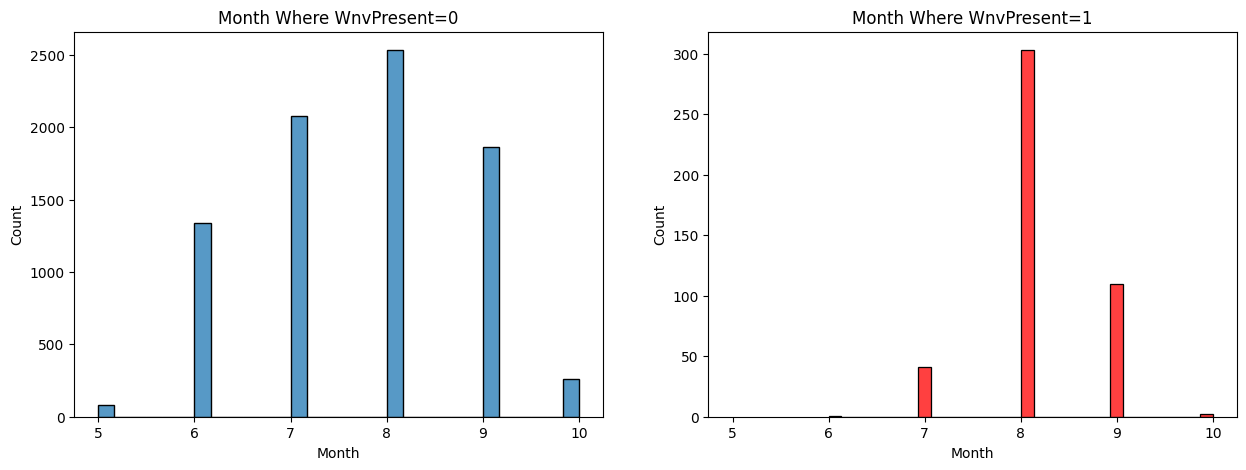

In [324]:
dual_histplot('Month')

We can see that about 90% of the cases where the virus was present were in August and September while the same pattern is not present in the cases where the virus was absent.

#### WnvPresent and Temperature

We know that temperature usually follows an annual pattern. We can explore to see if there is any connection between temperature and time as well as temperature and the presence of the virus.

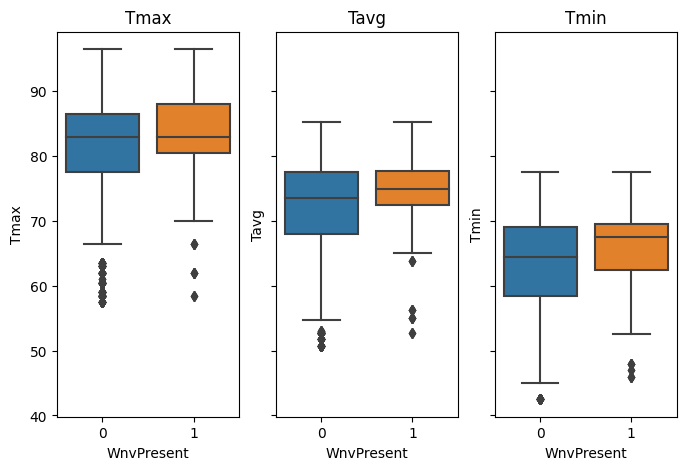

In [268]:
# Temperature boxplots
fig, ax = plt.subplots(1,3, figsize=(8,5), sharey=True)
# Tavg
sns.boxplot(ax=ax[0], data=wnv, x='WnvPresent', y='Tmax')
ax[0].set_title('Tmax')

# Tmax
sns.boxplot(ax=ax[1], data=wnv, x='WnvPresent', y='Tavg')
ax[1].set_title('Tavg')

# Tmin
sns.boxplot(ax=ax[2], data=wnv, x='WnvPresent', y='Tmin')
ax[2].set_title('Tmin')

plt.show()

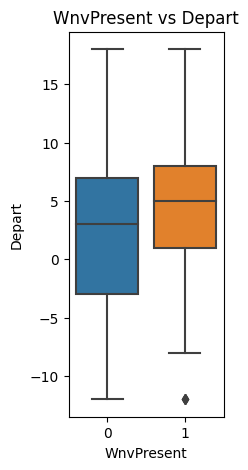

In [269]:
fig, ax = plt.subplots(figsize=(2,5))

# Depart
sns.boxplot(data=wnv, x='WnvPresent', y='Depart')
ax.set_title('WnvPresent vs Depart')

plt.show()

We can see that the temperature readings for the times the virus was present is generally higher than the times the virus was absent.

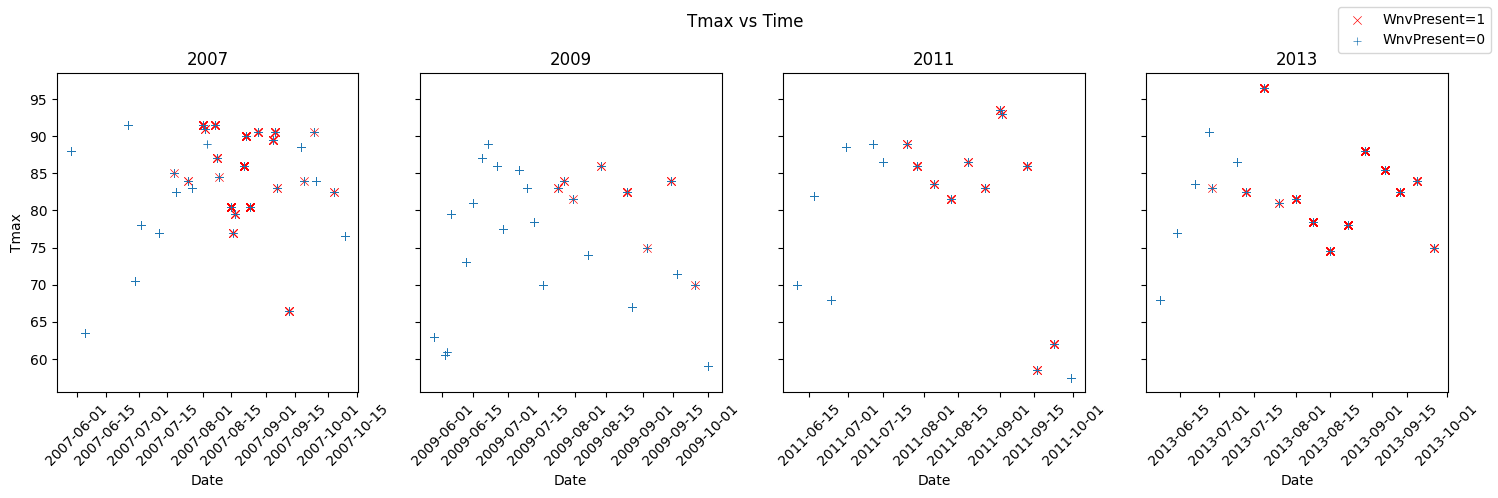

In [362]:
# Tmax scatterplot
scatter('Tmax')

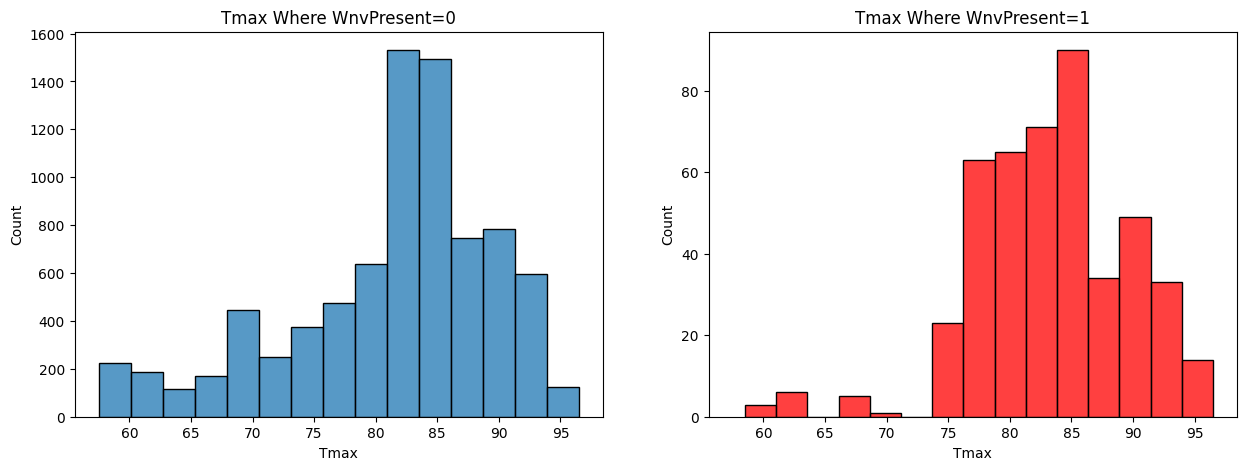

In [353]:
# Tmax histogram
dual_histplot('Tmax', bins=15)

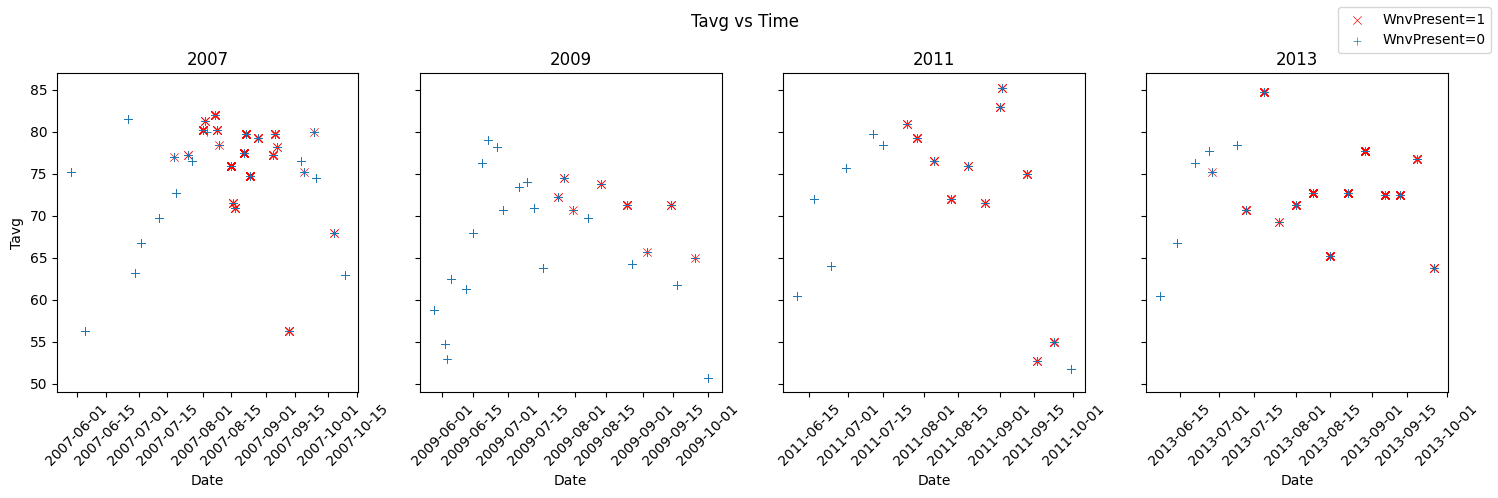

In [363]:
# Tavg scatterplot
scatter('Tavg')

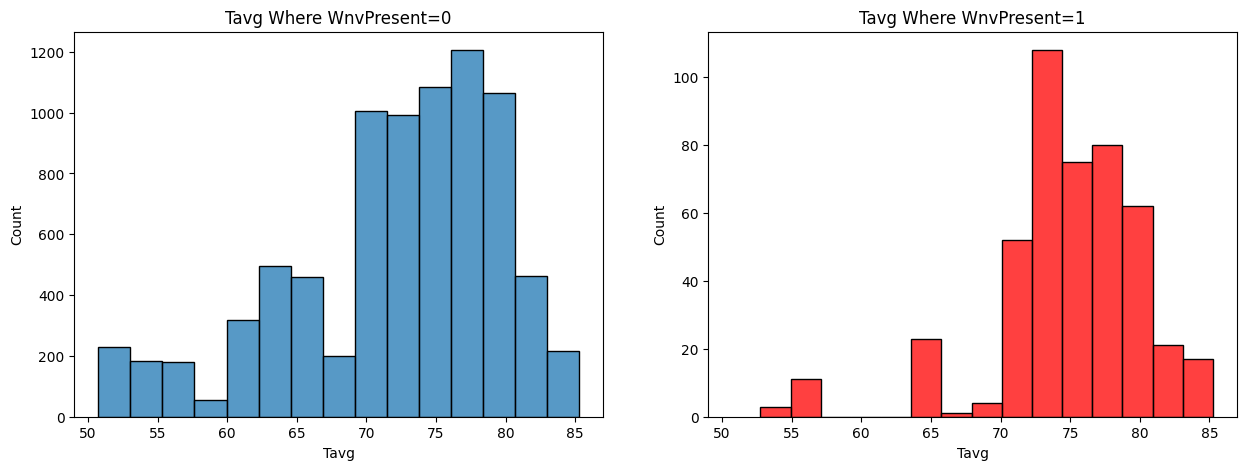

In [354]:
# Tavg histogram
dual_histplot('Tavg', bins=15)

There is a peak of cases of the virus at around an average temperature of 73 degrees Fahrenheit.

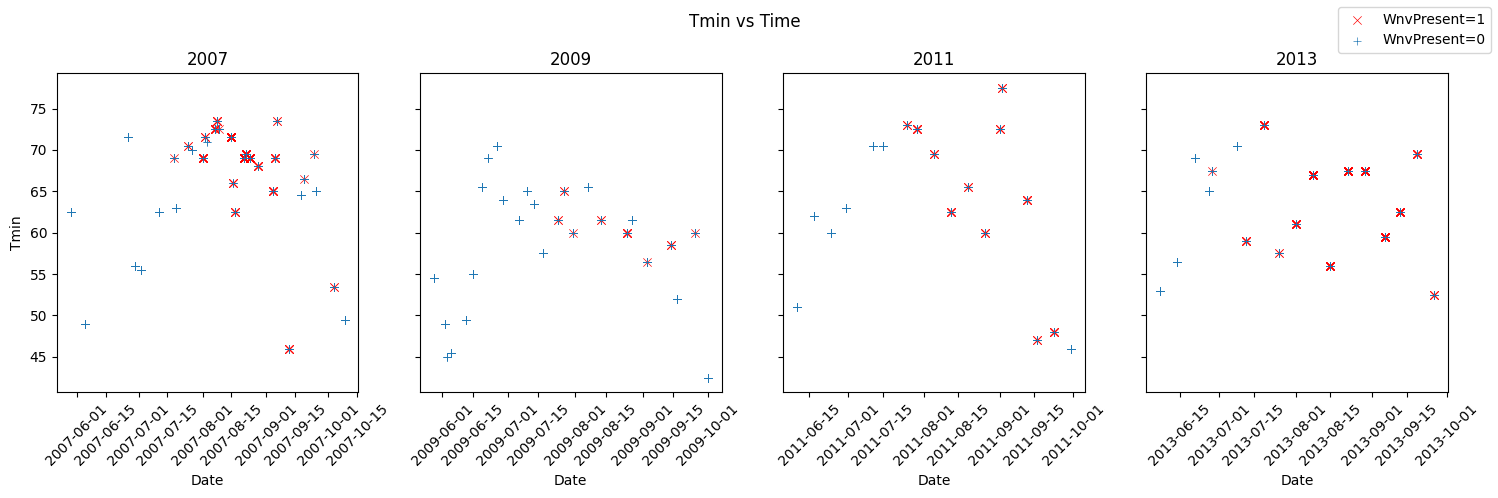

In [364]:
# Tavg scatter plot
scatter('Tmin')

The virus seems to be more present in mid to high temperatures for the most part. This is most apparent in 2007.

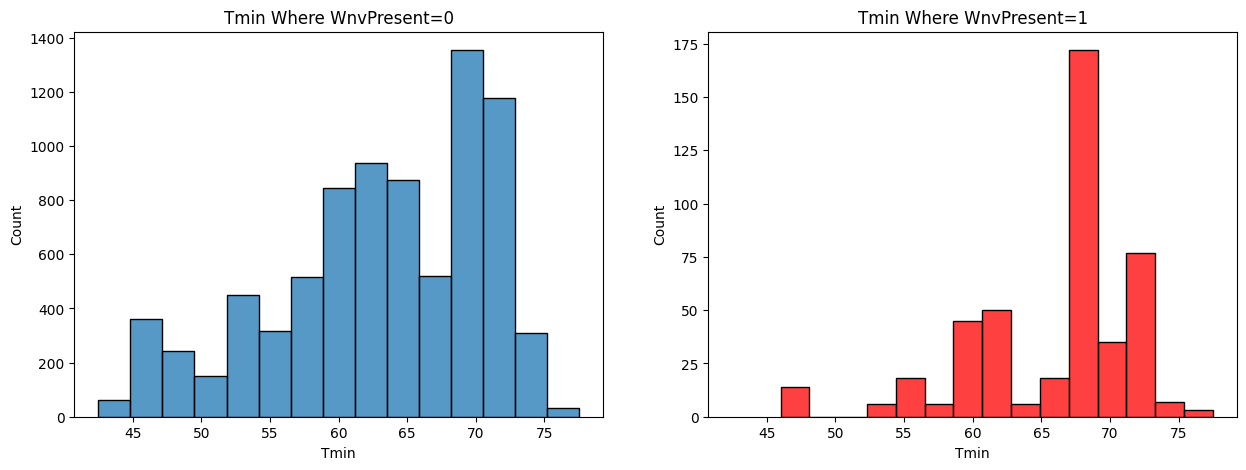

In [355]:
# Tmin histogram
dual_histplot('Tmin', bins=15)

There is a slight increase of cases of the virus at around an average temperature of 67 and 68 degrees Fahrenheit.

#### Species

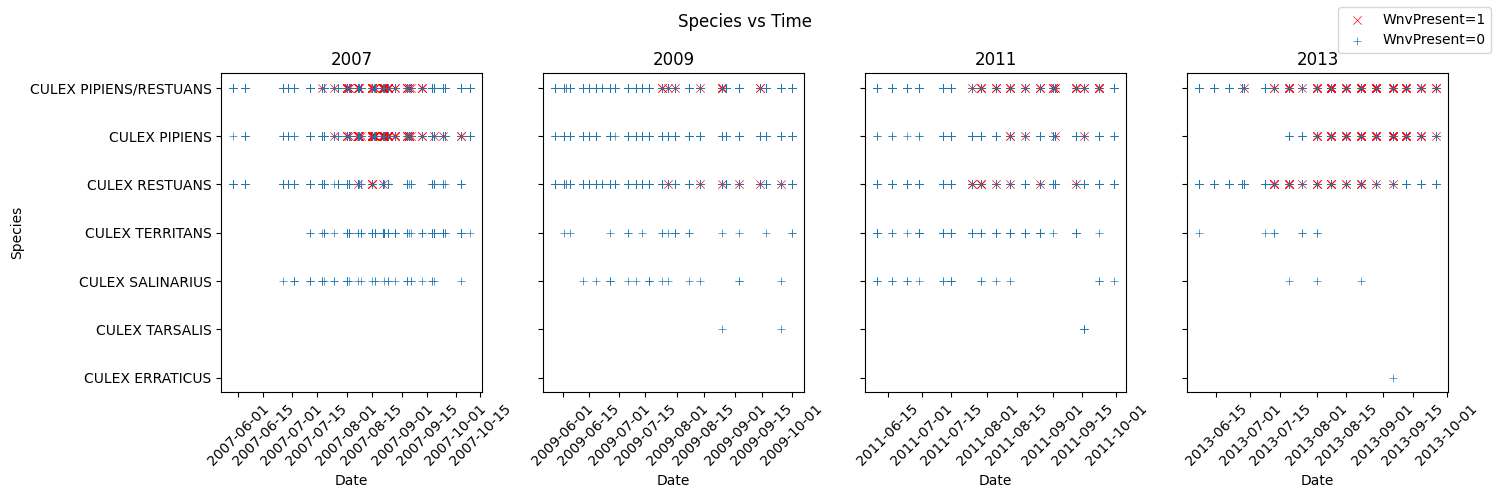

In [366]:
scatter('Species')

In [274]:
# percentage of 'WnvPresent' per Species
species = list(wnv['Species'].unique())
for i in species:
    vc = list(wnv[wnv['Species'] == i]['WnvPresent'].value_counts(normalize=True))
    print('Species: {}       [0, 1]: {}'.format(i, vc))

Species: CULEX PIPIENS/RESTUANS       [0, 1]: [0.9422928956142601, 0.057707104385739935]
Species: CULEX PIPIENS       [0, 1]: [0.9078156312625251, 0.09218436873747494]
Species: CULEX TERRITANS       [0, 1]: [1.0]
Species: CULEX RESTUANS       [0, 1]: [0.9800747198007472, 0.019925280199252802]
Species: CULEX SALINARIUS       [0, 1]: [1.0]
Species: CULEX TARSALIS       [0, 1]: [1.0]
Species: CULEX ERRATICUS       [0, 1]: [1.0]


We can see the virus is only present with the `culex pipiens` and `culex restauns` species.

#### Trap and Block Columns

To evaluate the impact of these columns with the presence of the virus we will calculate the ratio between the times the virus was detected and when the virus was absent for each of the traps and blocks in these columns.

In [275]:
def wnv_percent_df(column):
    '''This function creates a dataframe with the 'column' in first column and the ratio between WnvPresent=1
    and WnvPresent=0. In other words, it shows the percentage of times the virus is present in the given value
    of 'column'
    '''
    lst = list(wnv[column].unique())
    dic = {}
    for i in lst:
        vc = list(wnv[wnv[column] == i]['WnvPresent'].value_counts(normalize=True))
        dic[i] = 1 - vc[0]
    df = pd.DataFrame.from_dict(dic, orient='index').reset_index()
    df.rename(columns={'index': column, 0:'WnvPresent_%'}, inplace=True)
    return df

def wnv_percent_bargraph_x(column, figsize=(5,5)):
    """This function creates a standard bar graph that measures the the ratio between WnvPresent=1
    and WnvPresent=0.
    """
    lst = list(wnv[column].unique())
    dic = {}
    for i in lst:
        vc = list(wnv[wnv[column] == i]['WnvPresent'].value_counts(normalize=True))
        dic[i] = 1 - vc[0]
    blockpercent = pd.DataFrame.from_dict(dic, orient='index').reset_index()
    blockpercent.rename(columns={'index': column, 0:'WnvPresent_%'}, inplace=True)

    fig, ax = plt.subplots(figsize=figsize)
    
    sns.barplot(data=blockpercent, x=column, y='WnvPresent_%')
    plt.title('Percentage of Cases Where WnvPresent=1 for {} Column'.format(column))
    plt.tick_params(axis='x', labelrotation=45)
    plt.axhline(.05, ls='--')
    plt.axhline(.10, ls='--')
    plt.axhline(.15, ls='--')
    plt.show()
    
def wnv_percent_bargraph_y(column, figsize=(5,5)):
    """This function creates a horizontal bar graph that measures the the ratio between WnvPresent=1
    and WnvPresent=0.
    """
    lst = list(wnv[column].unique())
    dic = {}
    for i in lst:
        vc = list(wnv[wnv[column] == i]['WnvPresent'].value_counts(normalize=True))
        dic[i] = 1 - vc[0]
    blockpercent = pd.DataFrame.from_dict(dic, orient='index').reset_index()
    blockpercent.rename(columns={'index': column, 0:'WnvPresent_%'}, inplace=True)

    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(data=blockpercent, y=column, x='WnvPresent_%')
    plt.title('Percentage of Cases Where WnvPresent=1 for {} Column'.format(column))
    plt.tick_params(axis='x', labelrotation=45)
    plt.axvline(.05, ls='--')
    plt.axvline(.10, ls='--')
    plt.axvline(.15, ls='--')
    plt.show()

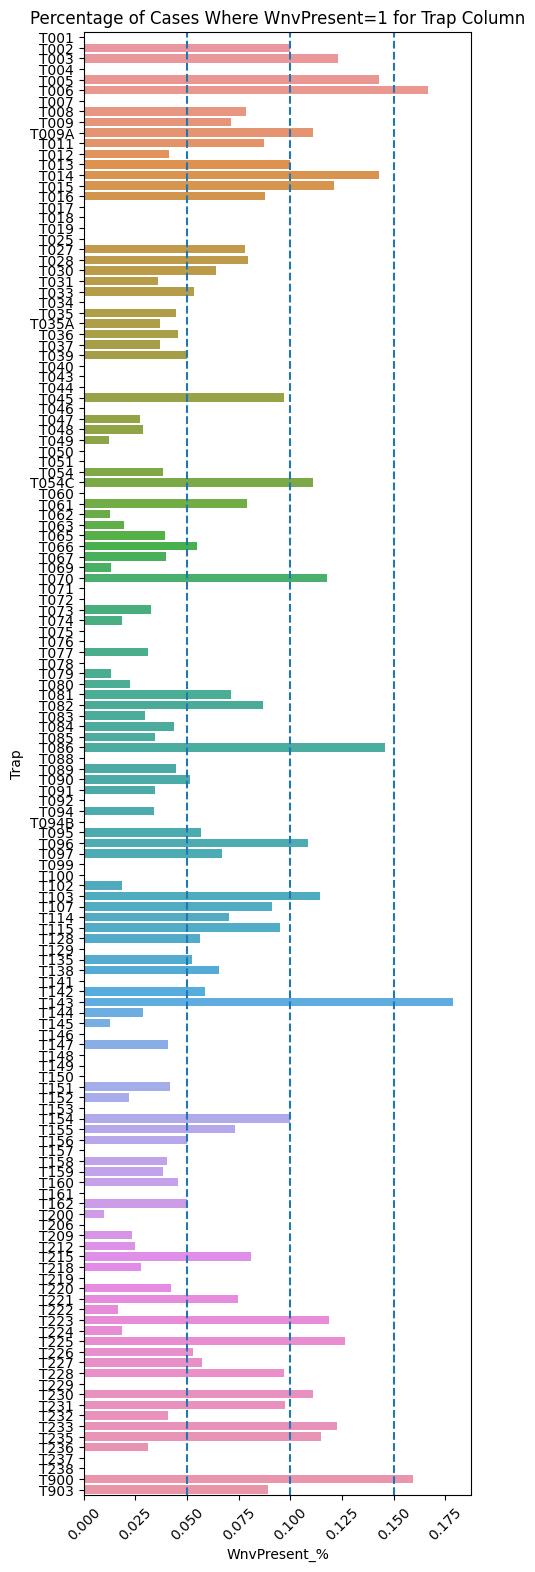

In [276]:
wnv_percent_bargraph_y('Trap', figsize=(5,19))

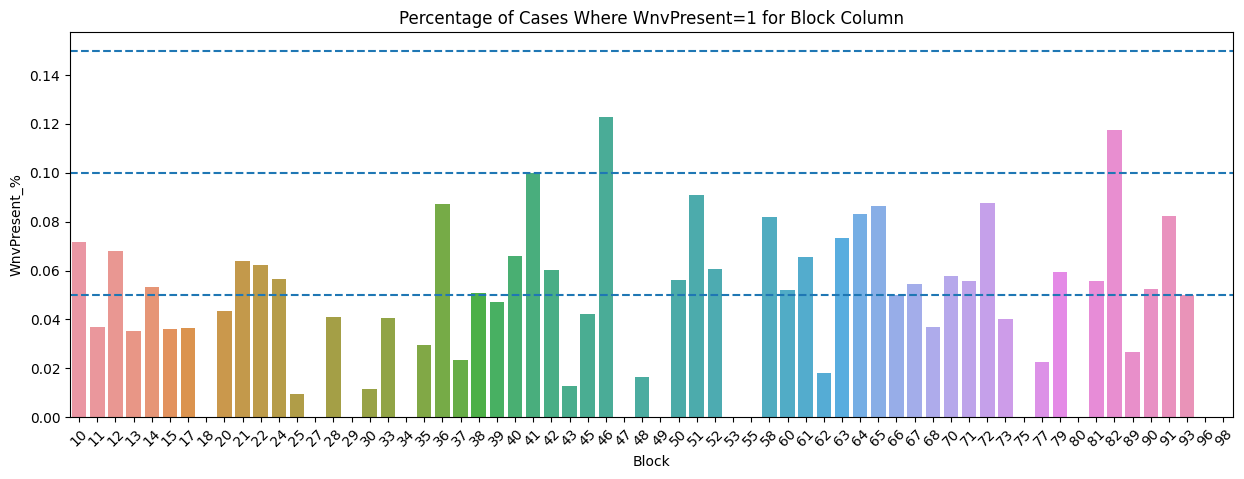

In [277]:
wnv_percent_bargraph_x('Block', figsize=(15,5))

We can see that the majority of the entries for each trap indicates that the virus was present less than 15% of the time for most blocks. The exception being traps T006, T143 and T900.

We can see that the majority of the entries for each block indicates that the virus was present less than 10% of the time for most blocks. The exception being block 46 and block 82 with the virus being present close to 12% for both.

Let's examine if these particular traps and blocks  can be considered significant.

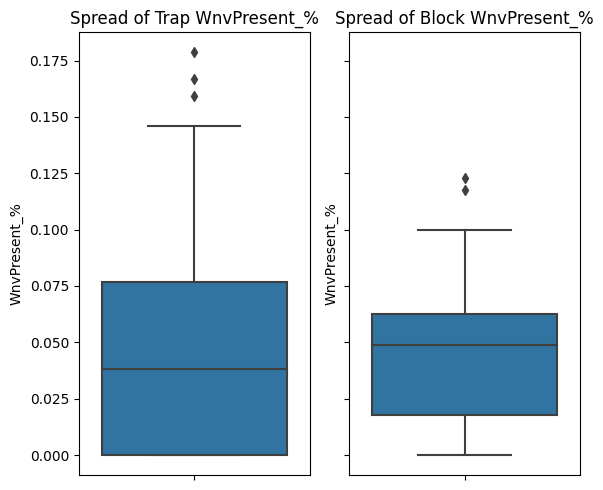

In [356]:
fig, ax = plt.subplots(1,2, figsize=(6,5), sharey=True)

# Trap spread of values where the WnvPresent=1 percentage
sns.boxplot(ax=ax[0], data=wnv_percent_df('Trap'), y='WnvPresent_%', whis=1)
ax[0].set_title('Spread of Trap WnvPresent_%')

# Block spread of values where the WnvPresent=1 percentage
sns.boxplot(ax=ax[1], data=wnv_percent_df('Block'), y='WnvPresent_%', whis=1)
ax[1].set_title('Spread of Block WnvPresent_%')

fig.tight_layout()
plt.show()

It appears that the traps and blocks we had pointed out (traps T006, T143, T900 and blocks 46 and 42) are beyond 1x the interquartile range. 

In [329]:
# This is to find the traps that are in the blocks that are of significance
block46 = list(wnv[wnv['Block'] == 46]['Trap'].unique())
block82 = list(wnv[wnv['Block'] == 82]['Trap'].unique())
print('Traps in Block 46: {}'.format(block46))
print('Traps in Block 82: {}'.format(block82))

Traps in Block 46: ['T003']
Traps in Block 82: ['T097', 'T225']


#### DewPoint and WetBulb

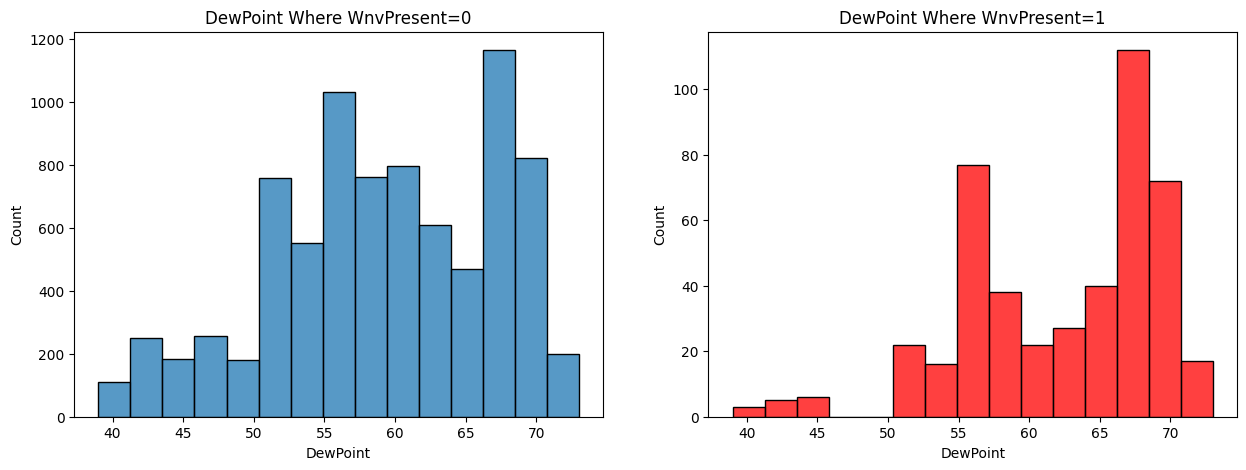

In [367]:
dual_histplot('DewPoint', bins=15)

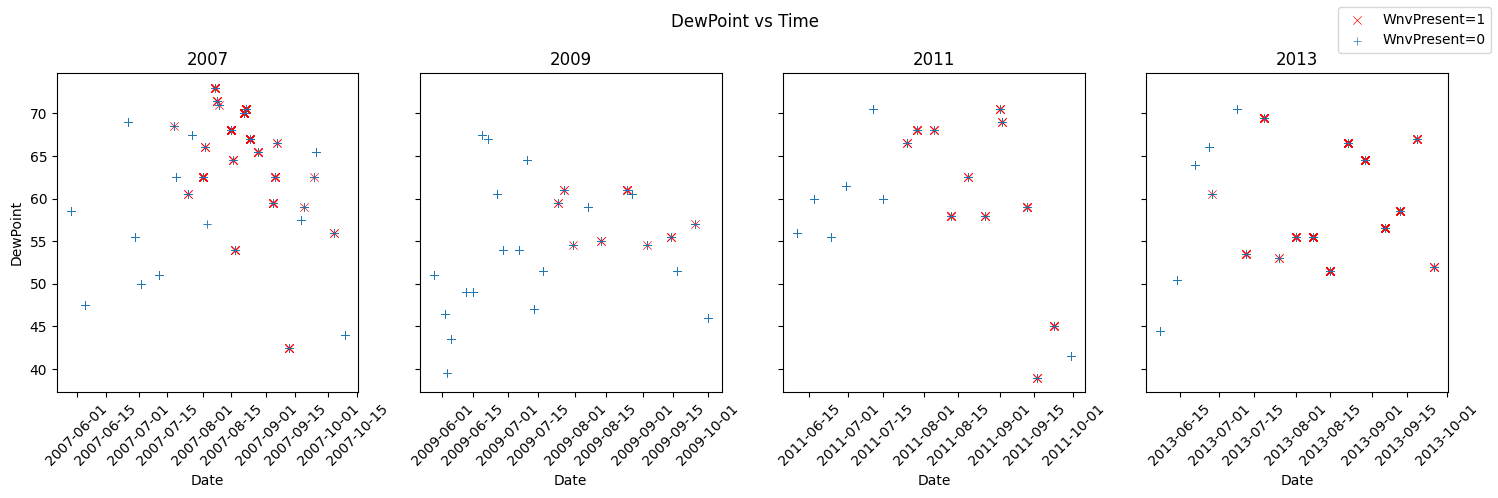

In [368]:
scatter('DewPoint')

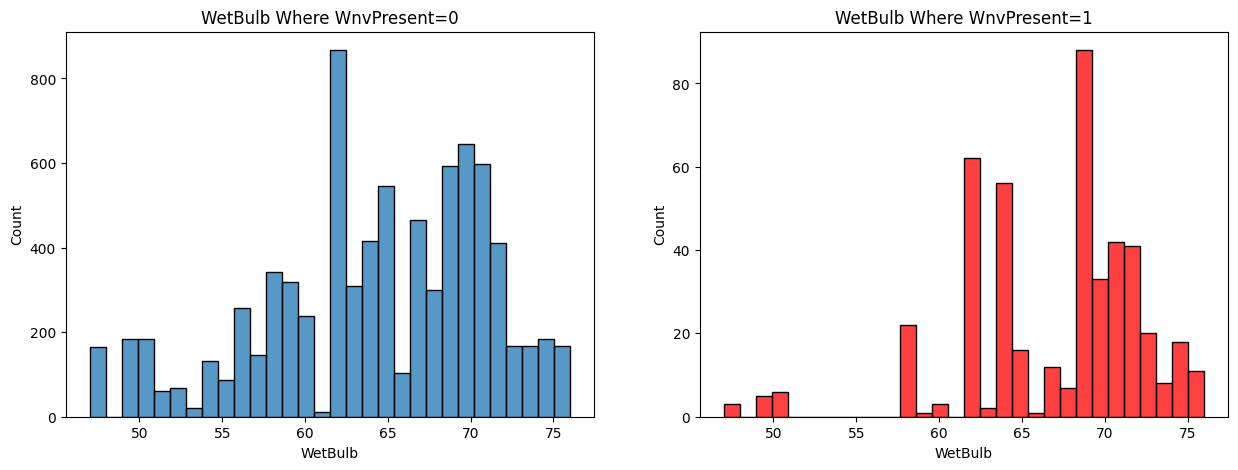

In [299]:
# WetBulb
dual_histplot('WetBulb')

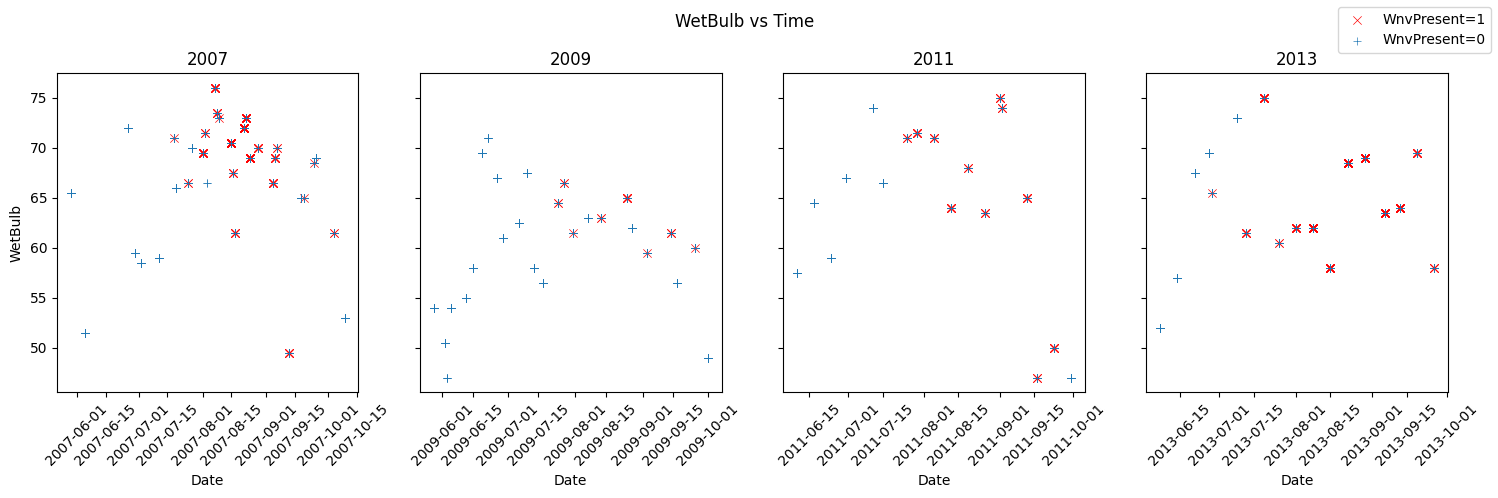

In [369]:
scatter('WetBulb')

There is a peak of cases of the virus where the dew point is 55, 67 and 70. There is also a significant peak of cases where the wet bulb is ~68.

#### Heat and Cool

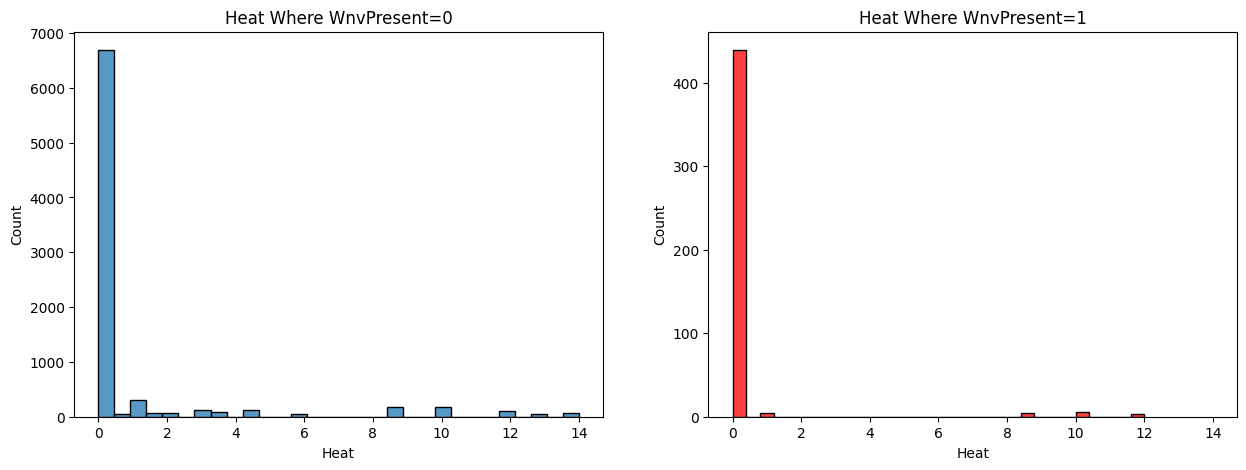

In [310]:
# Heat
dual_histplot('Heat')

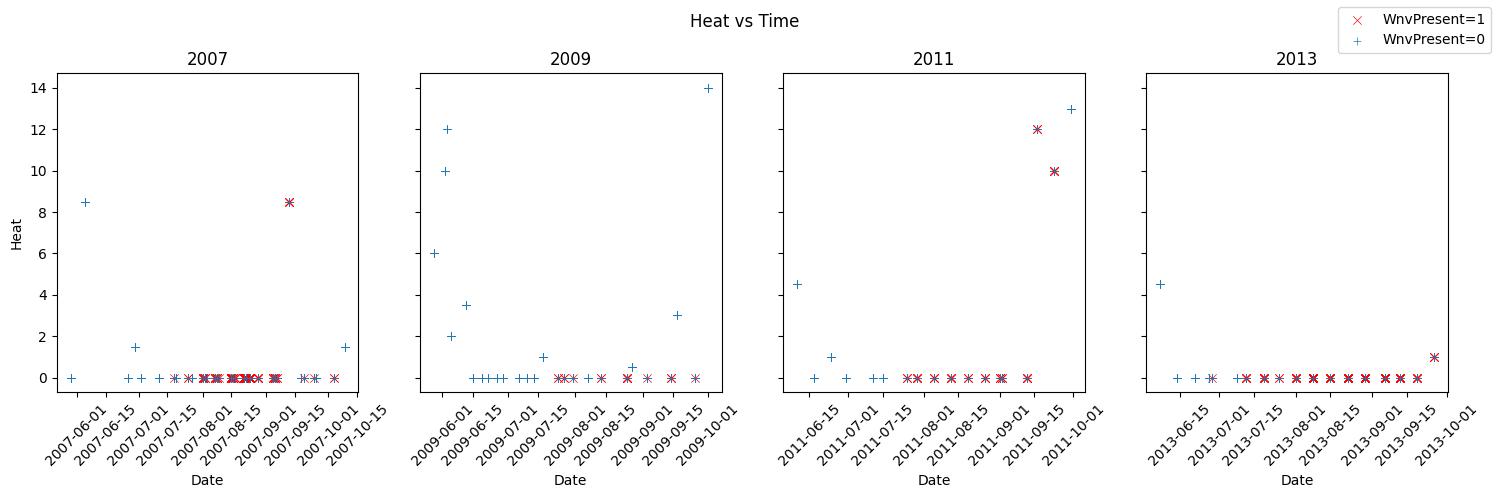

In [370]:
scatter('Heat')

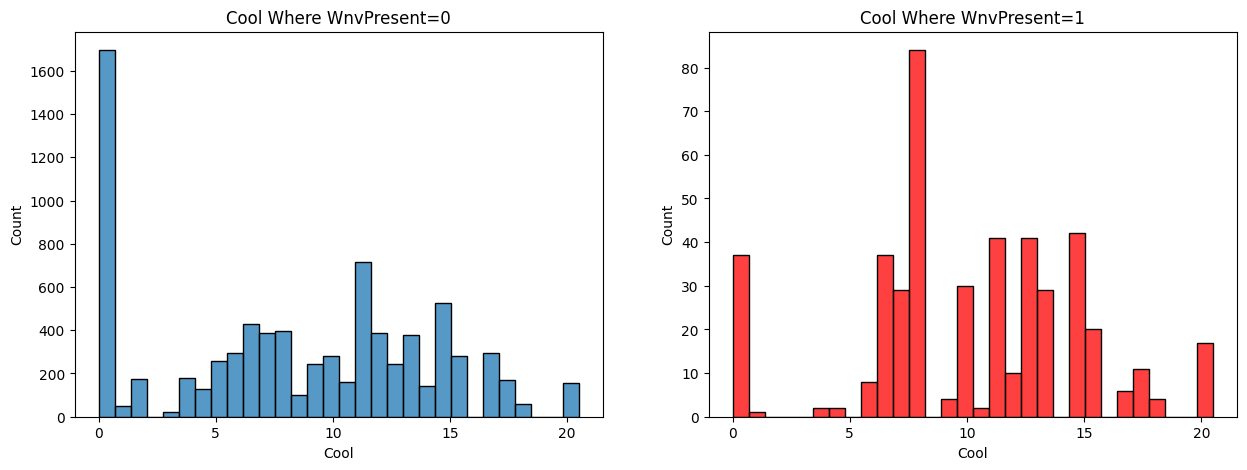

In [298]:
# Cool
dual_histplot('Cool')

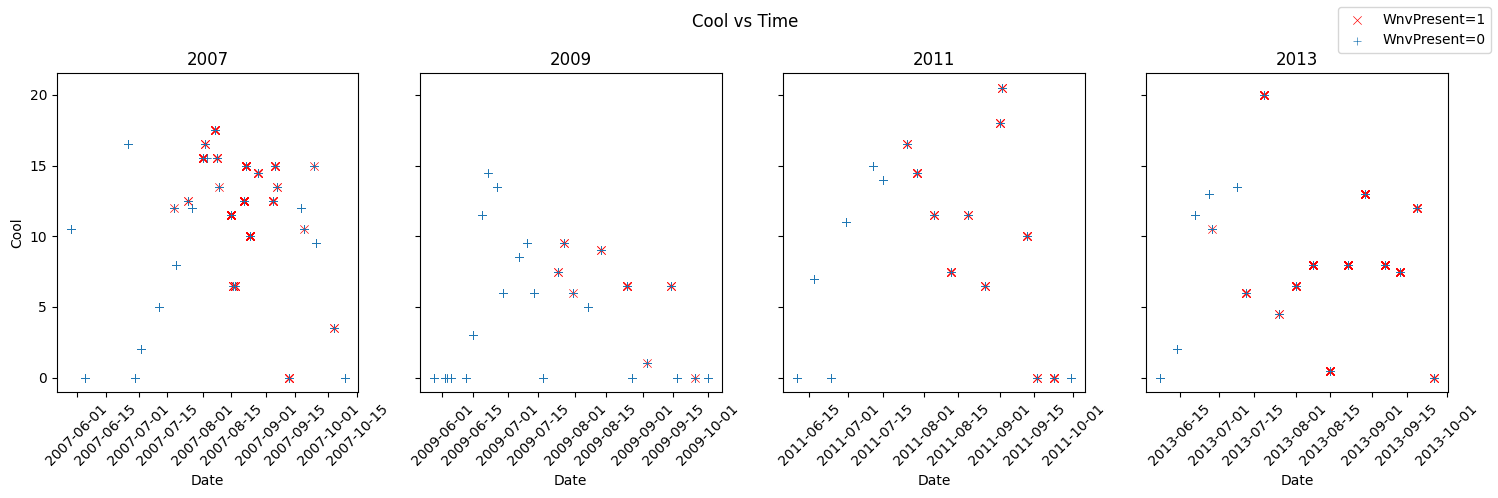

In [371]:
scatter('Cool')

There doesn't seem to be any apparent significance with the `Heat` column but there is an increase of positive cases where `Cool` is around 8.

#### Sunrise and Sunset

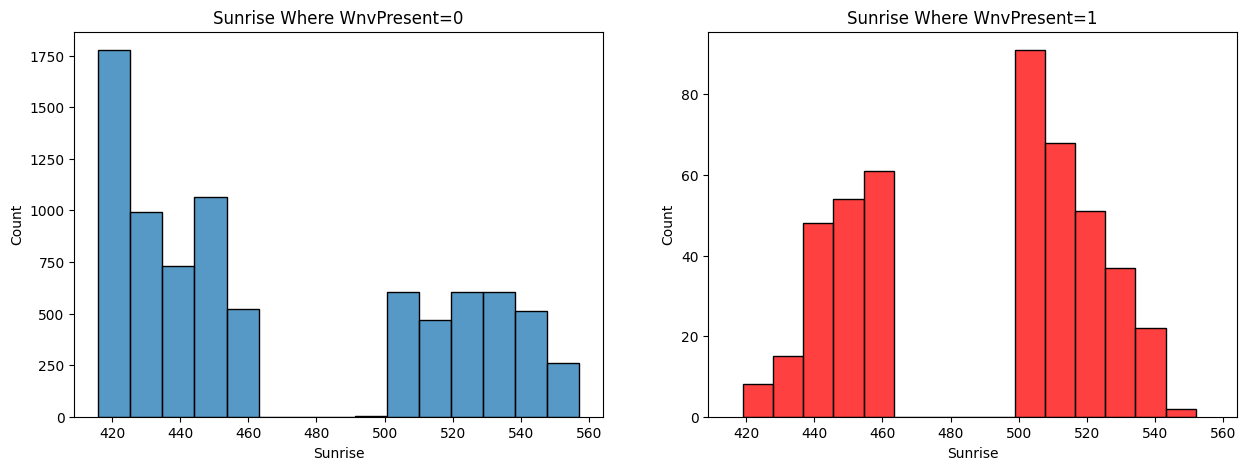

In [334]:
# Sunrise
dual_histplot('Sunrise', bins=15)

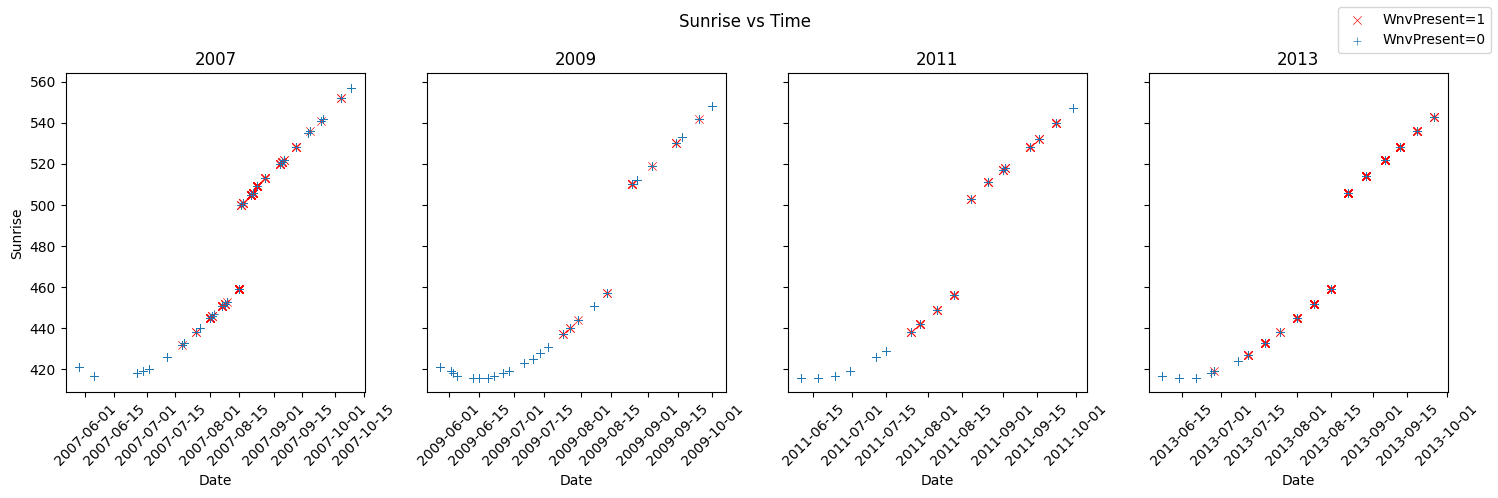

In [372]:
scatter('Sunrise')

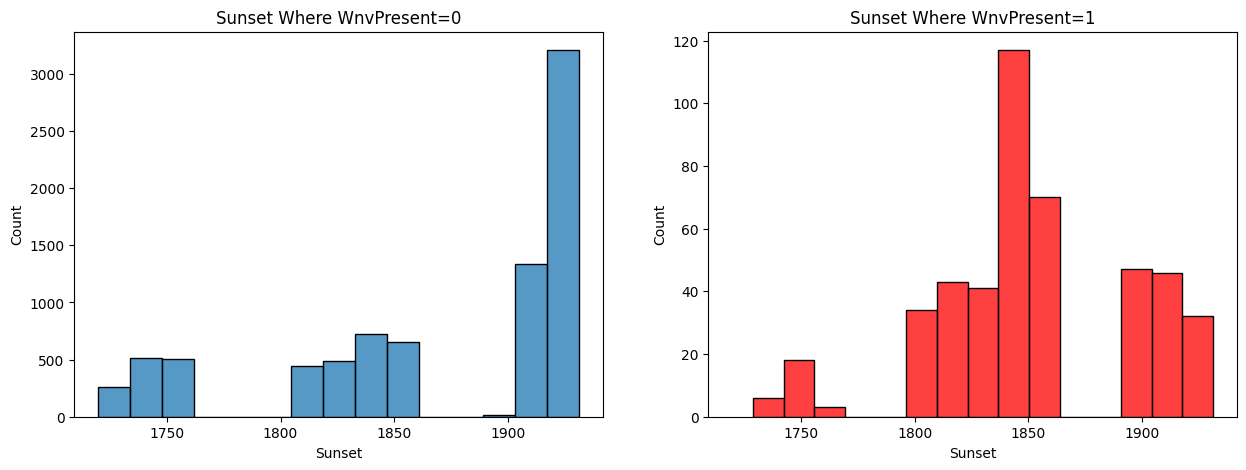

In [335]:
# Sunset
dual_histplot('Sunset', bins=15)

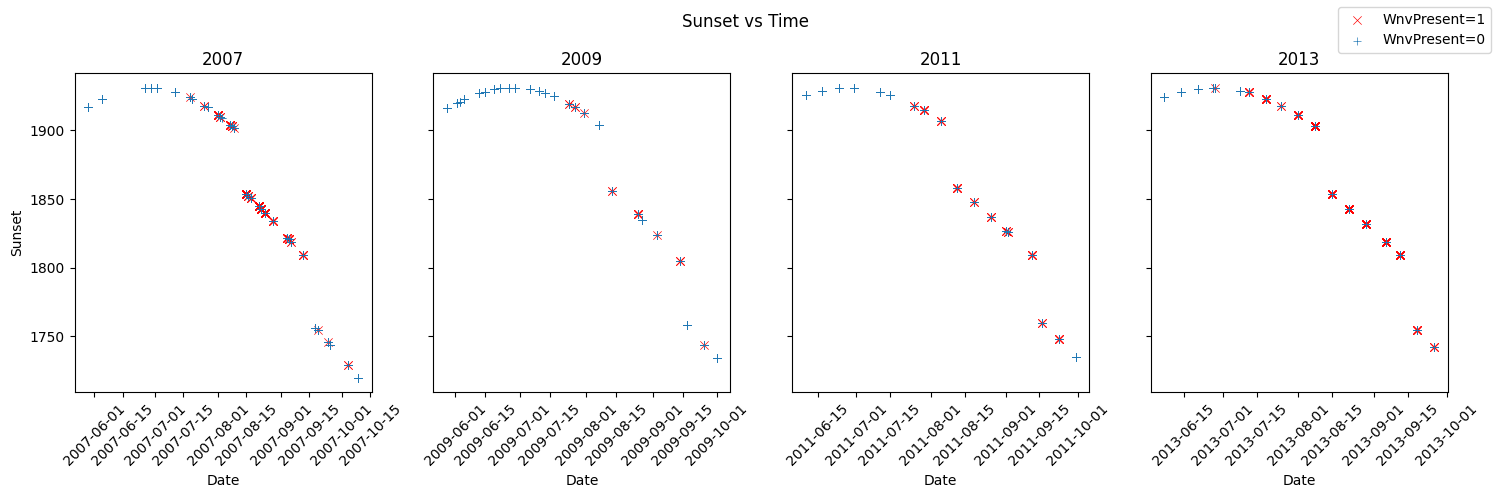

In [373]:
scatter('Sunset')

There are notable differences in both `Sunrise` and `Sunset`. There is an increase of cases of the virus when the sunset is between 440 and 460 as well as between 500 and 530. There also is a peak of cases when the sunset is between 1840 an 1860. This seems to be in line with the months of August and September we saw earlier.

#### SnowFall and PrecipTotal

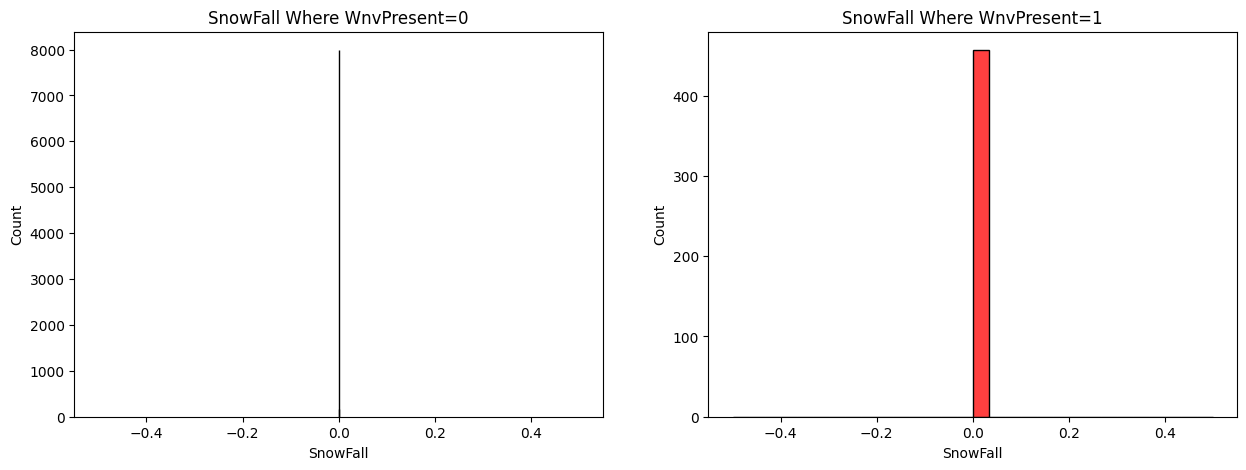

In [340]:
# SnowFall
dual_histplot('SnowFall')

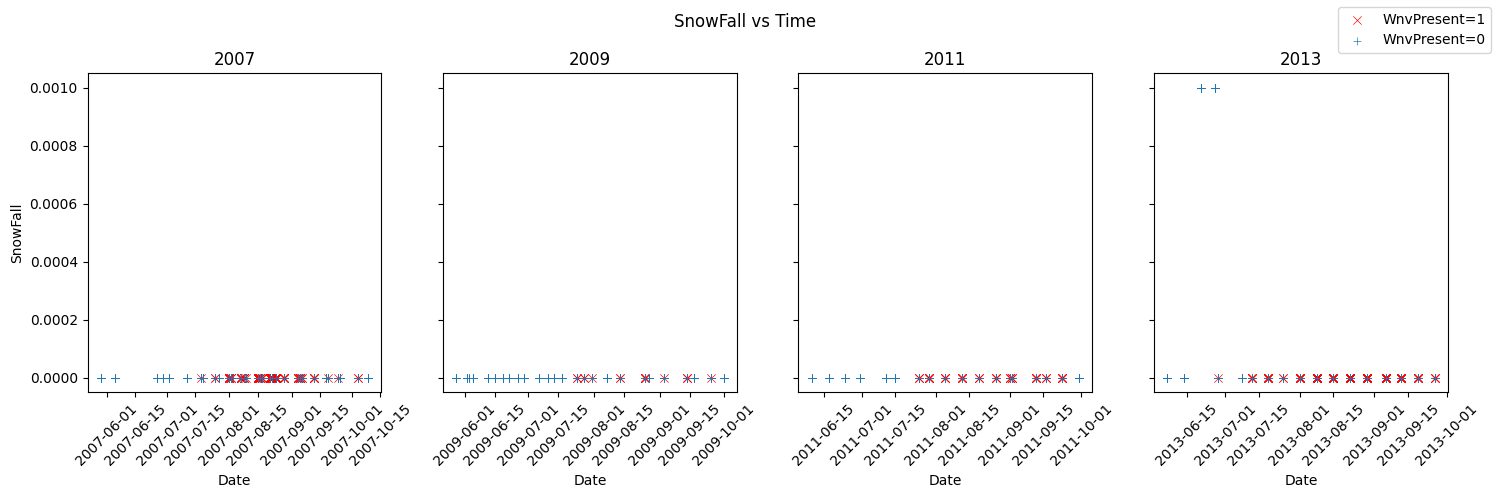

In [374]:
scatter('SnowFall')

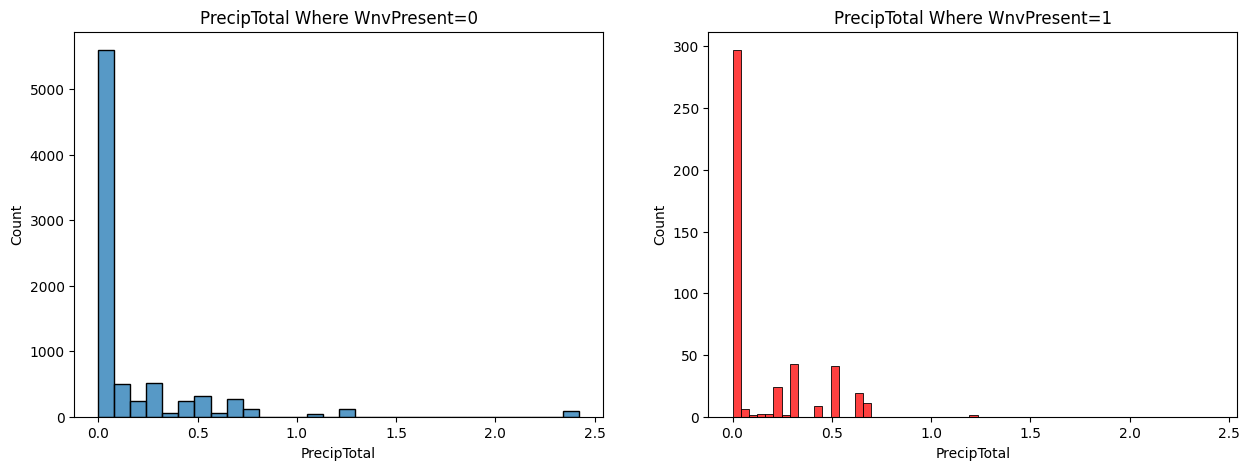

In [313]:
#  PrecipTotal
dual_histplot('PrecipTotal')

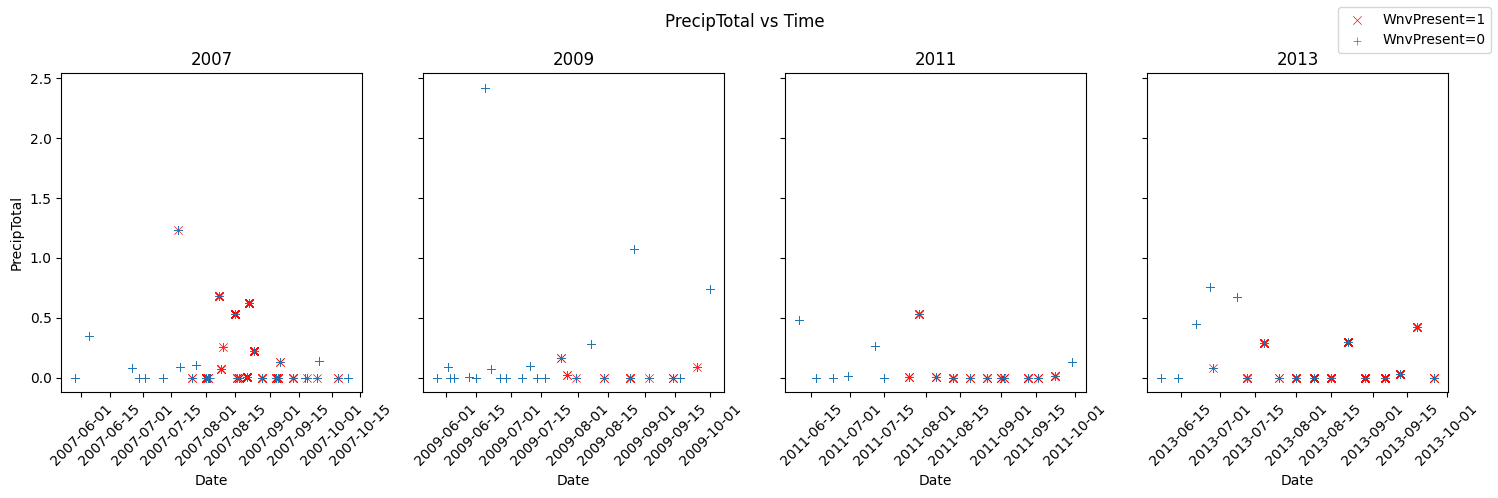

In [375]:
scatter('PrecipTotal')

These two columns don't show anything of significance for the presence of the virus.

#### StnPressure and SeaLevel

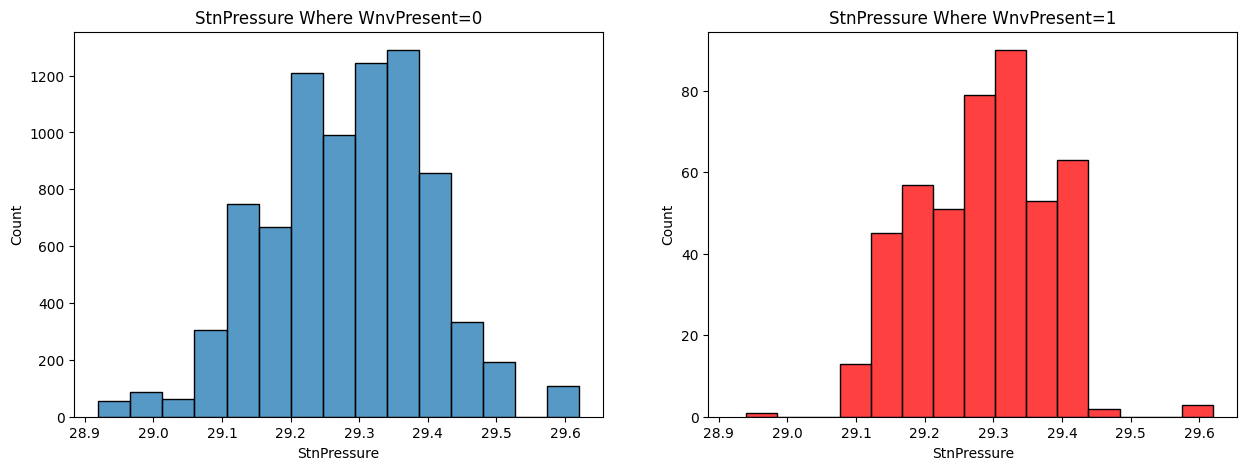

In [342]:
# StnPressure
dual_histplot('StnPressure', bins=15)

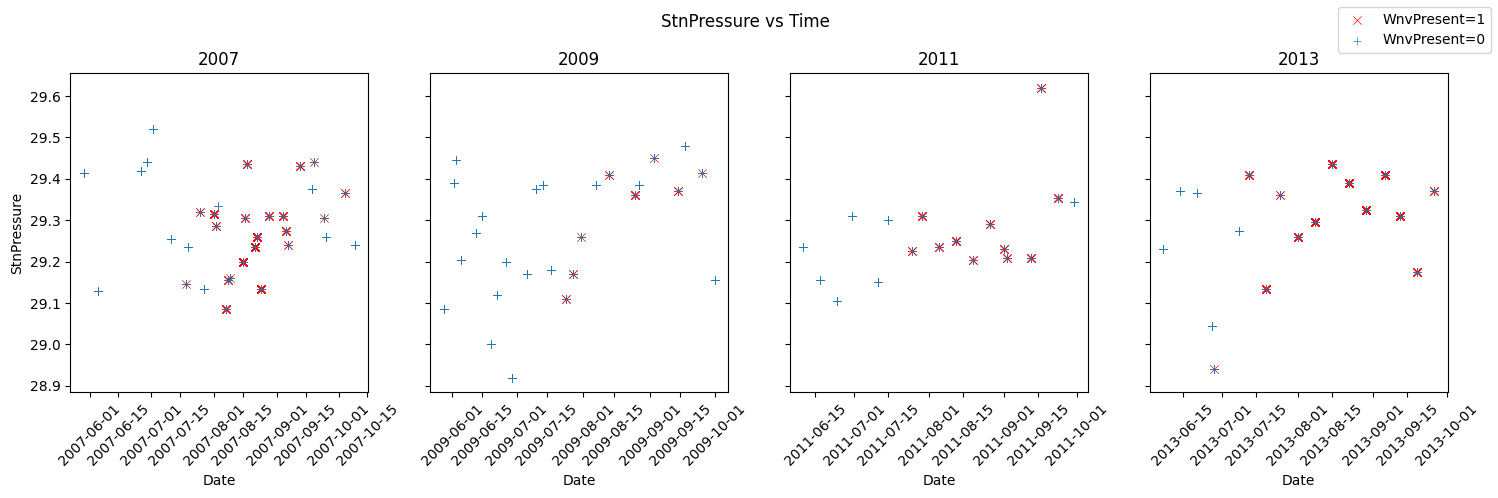

In [376]:
scatter('StnPressure')

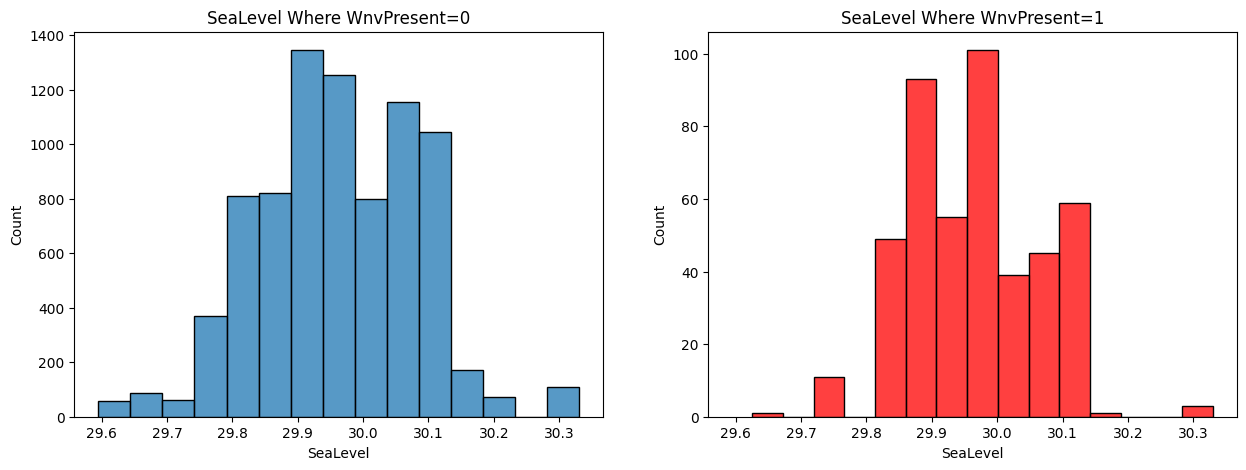

In [343]:
# SeaLevel
dual_histplot('SeaLevel', bins=15)

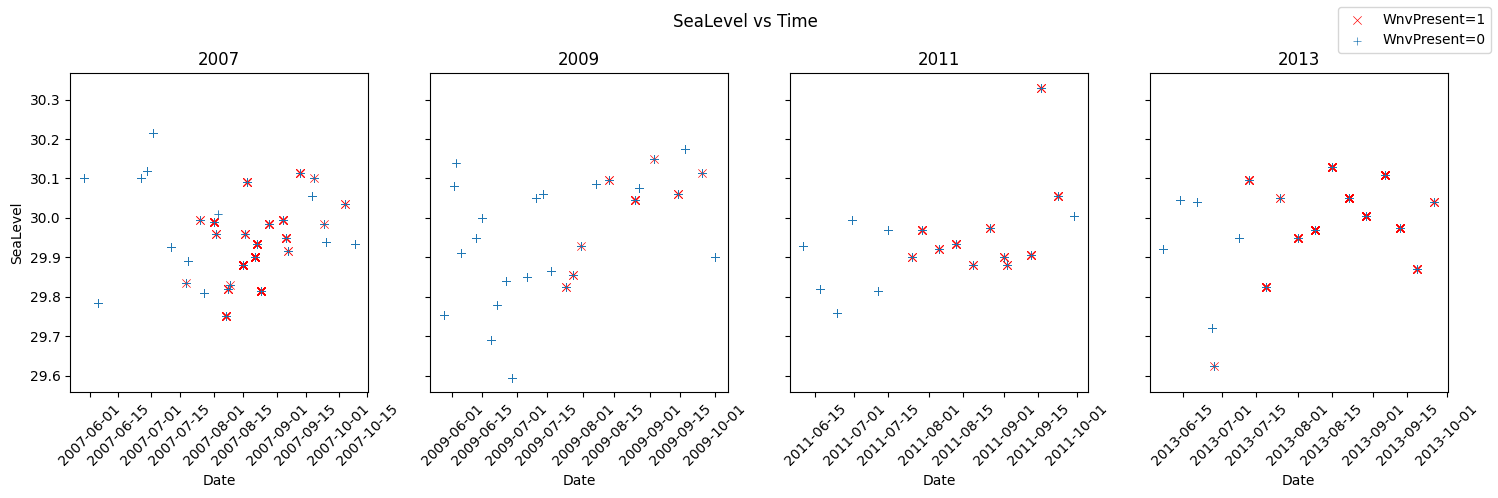

In [377]:
scatter('SeaLevel')

There doesn't appear to be anything drastic in these to column but some very slight peaks.

#### ResultSpeed, ResultDir, and AvgSpeed

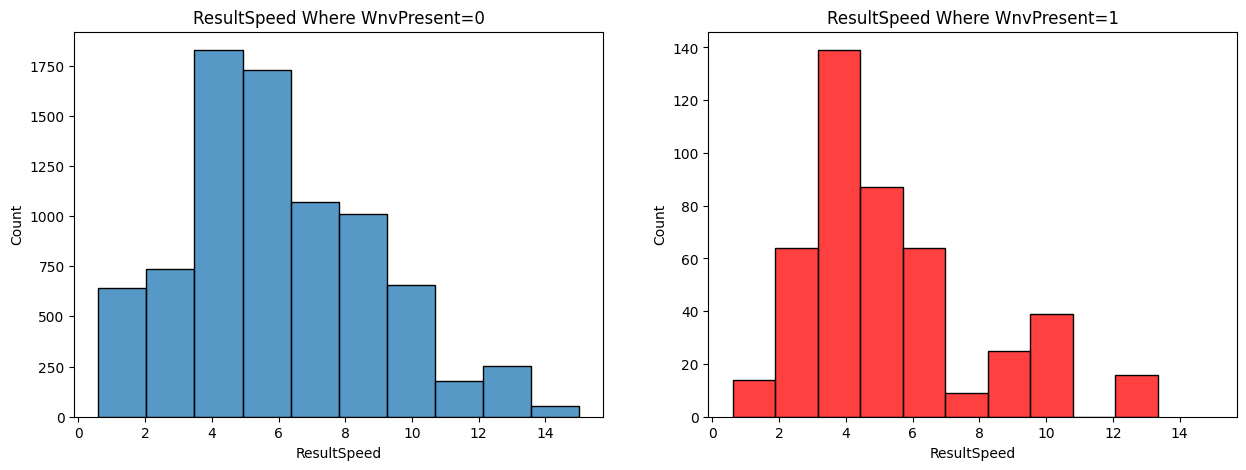

In [348]:
# ResultSpeed
dual_histplot('ResultSpeed', bins=10)

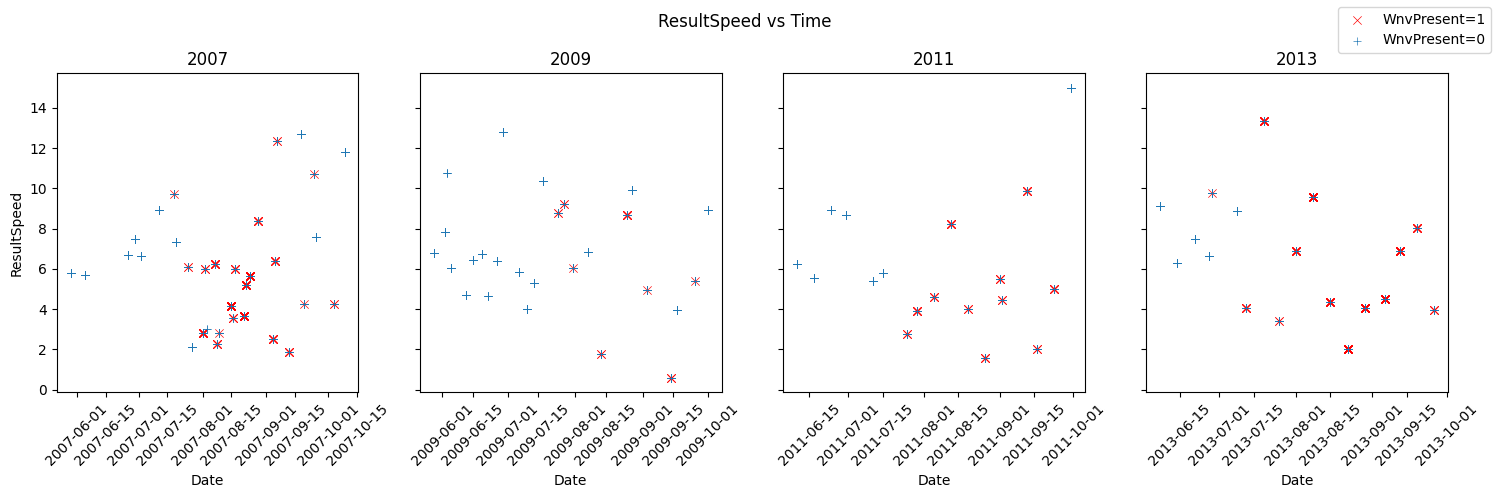

In [378]:
scatter('ResultSpeed')

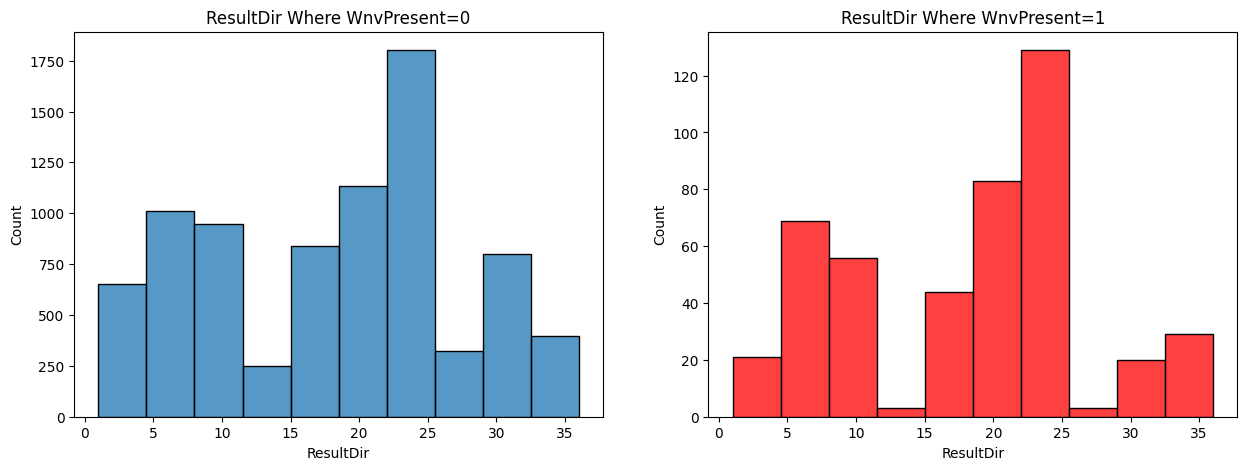

In [347]:
# ResultDir
dual_histplot('ResultDir', bins=10)

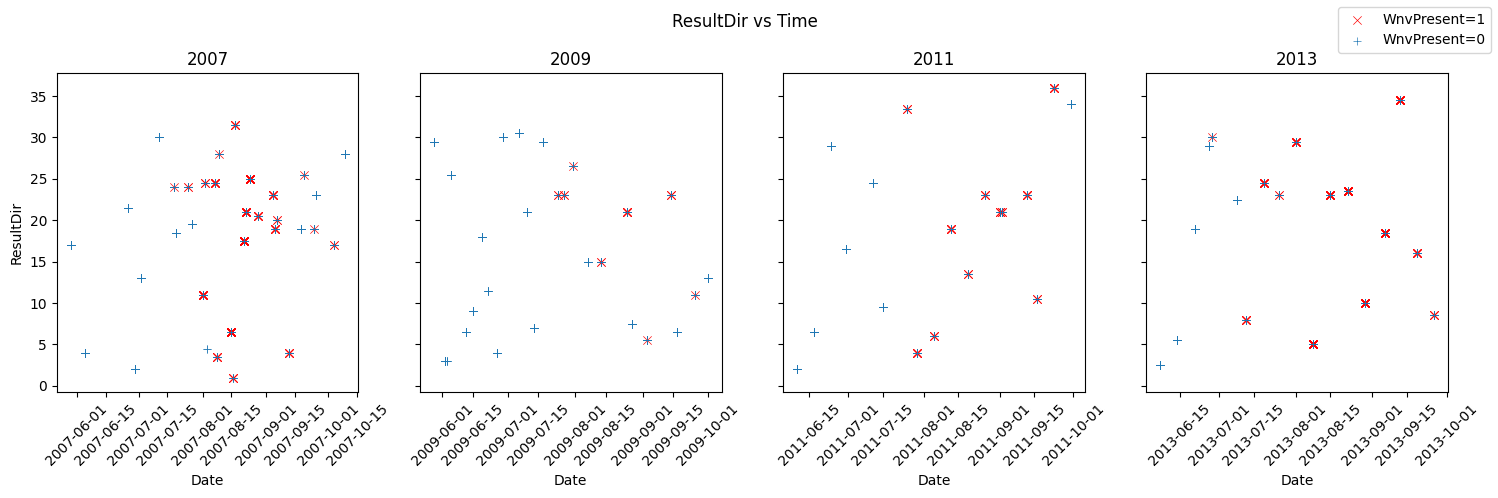

In [379]:
scatter('ResultDir')

Nothing drastic here as well. There is only a slight higher concentration of cases at `ResultSpeed`= ~4

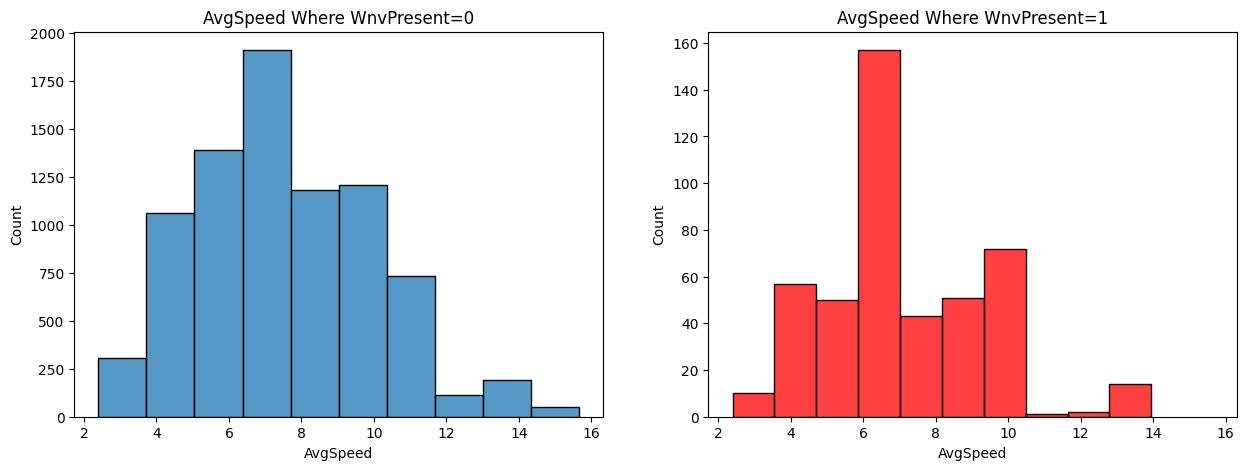

In [350]:
# AvgSpeed
dual_histplot('AvgSpeed', bins=10)

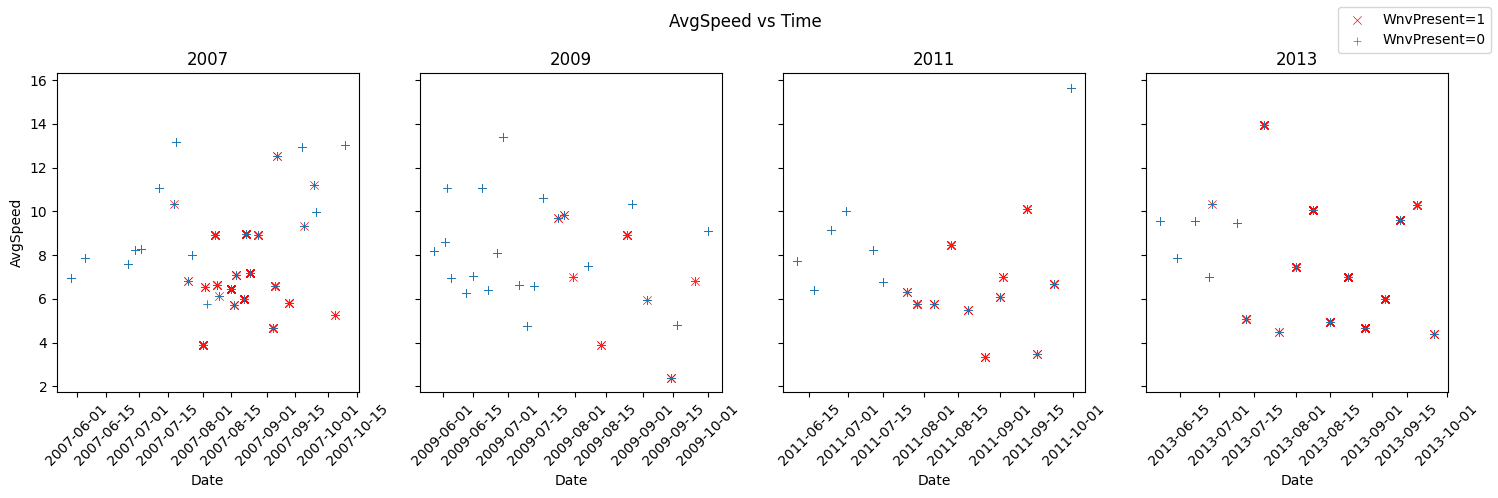

In [380]:
scatter('AvgSpeed')

There is a peak of cases at around `AvgSpeed`=6

#### Correlation Plot

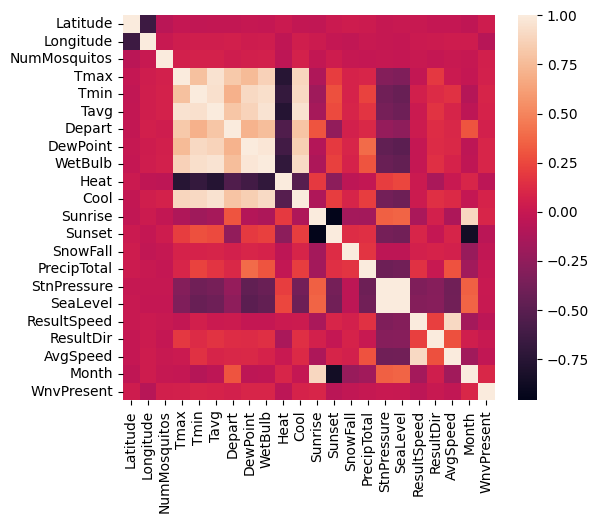

In [284]:
corr_columns = ['Latitude', 'Longitude', 'NumMosquitos', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint','WetBulb',
                'Heat', 'Cool', 'Sunrise', 'Sunset', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
                'ResultSpeed', 'ResultDir', 'AvgSpeed', 'Month', 'WnvPresent']

wnvcorr = wnv[corr_columns].corr()
plt.subplots(figsize=(6,5))
sns.heatmap(wnvcorr)
plt.show()

Looking at this correlation plot, we can see that things seem to be on par with what we have found so far.

In [285]:
# WnvPresent value counts
wnv['WnvPresent'].value_counts(normalize=True)

0    0.946922
1    0.053078
Name: WnvPresent, dtype: float64

Another thing to keep in mind that the vast majority of the entries show the virus is absent. The cases between the presence and the absence of the virus are not evenly distributed.